<a href="https://colab.research.google.com/github/nagasai17/Tarp-project/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
data=pd.read_excel('/content/Merged_2.xlsx')
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')
data


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,NAME,Age,Highest Degree,English,Coding,Art,Accounting ability,known service based abilities,negotiations,Design and planning,Sector
0,naga,20,MBBS,YES,NO,YES,NO,YES,NO,NO,Health
1,hari,22,BTECH,YES,YES,NO,NO,YES,NO,NO,IT
2,teja,23,MBBS,YES,NO,NO,NO,YES,NO,NO,Health
3,ravi,21,12th,YES,NO,YES,NO,YES,NO,NO,ARTS
4,hrithik,20,11th,NO,NO,YES,NO,NO,NO,NO,ARTS
...,...,...,...,...,...,...,...,...,...,...,...
701,Samara simha,37,11th,NO,NO,YES,YES,NO,NO,NO,ARTS
702,Mohan,44,10th,NO,NO,YES,NO,NO,NO,NO,ARTS
703,ragapriya,28,BCOM,NO,NO,YES,NO,NO,NO,NO,ARTS
704,jeevan,20,10th,NO,NO,YES,NO,YES,NO,NO,ARTS


Encoding means coverting all categorical to Numerical

In [2]:

# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)



,NAME,Highest Degree,English,Coding,Art,Accounting ability,known service based abilities,negotiations,Design and planning,Sector
0,397,6,1,0,1,0,2,0,0,3
1,329,5,1,1,0,0,2,0,0,4
2,503,6,1,0,0,0,2,0,0,3
3,452,2,1,0,1,0,2,0,0,0
4,336,1,0,0,1,0,1,0,0,0
5,297,6,1,0,1,0,2,0,0,3
6,433,5,1,0,0,0,2,1,1,5
7,386,5,1,0,0,1,2,0,0,2
8,479,6,1,0,0,0,1,0,0,3
9,424,5,0,0,0,0,1,1,1,5


One hot encoder


In [3]:
X = data[data.columns[2:-1]] 
y = data[data.columns[-1]] 
print(X)
print(y)

     Highest Degree  English   ...  negotiations  Design and planning
0                 6         1  ...             0                    0
1                 5         1  ...             0                    0
2                 6         1  ...             0                    0
3                 2         1  ...             0                    0
4                 1         0  ...             0                    0
..              ...       ...  ...           ...                  ...
701               1         0  ...             0                    0
702               0         0  ...             0                    0
703               3         0  ...             0                    0
704               0         0  ...             0                    0
705               2         0  ...             0                    0

[706 rows x 8 columns]
0      3
1      4
2      3
3      0
4      0
      ..
701    0
702    0
703    0
704    0
705    0
Name: Sector, Length: 706, dtype: int

splitting our data set


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
y

(388, 8)
(318, 8)
(388,)
(318,)


0      3
1      4
2      3
3      0
4      0
      ..
701    0
702    0
703    0
704    0
705    0
Name: Sector, Length: 706, dtype: int64

Encoding



,Highest Degree,English,Coding,Art,Accounting ability,known service based abilities,negotiations,Design and planning
0,4,1,0,1,0,1,0,0
1,3,1,1,0,0,1,0,0
2,4,1,0,0,0,1,0,0
3,2,1,0,1,0,1,0,0
4,1,0,0,1,0,0,0,0
5,4,1,0,1,0,1,0,0
6,3,1,0,0,0,1,1,1
7,3,1,0,0,1,1,0,0
8,4,1,0,0,0,0,0,0
9,3,0,0,0,0,0,1,1


Desicion Tree classifier


In [28]:




clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

*accuracy* for Decision Tree Classifier 

In [29]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print("Precison:",metrics.precision_score(y_test,  y_pred,average='weighted') )
print("recall:",metrics.recall_score(y_test,  y_pred,average='weighted') )
print("F1Score:",metrics.f1_score(y_test,  y_pred,average='weighted') )

Accuracy: 0.9654088050314465
Precison: 0.9665520051878772
recall: 0.9654088050314465
F1Score: 0.9653635493094994


Multinomial Naive Baiyes

In [30]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_predwithnaive = gnb.predict(X_test)
y_predwithnaive

array([2, 2, 4, 4, 5, 2, 4, 2, 1, 3, 5, 0, 5, 1, 1, 2, 5, 4, 5, 2, 1, 2,
       1, 0, 0, 5, 2, 4, 5, 1, 3, 2, 5, 0, 2, 2, 5, 0, 1, 3, 4, 2, 0, 1,
       1, 4, 0, 3, 5, 4, 4, 0, 2, 5, 4, 0, 2, 5, 0, 2, 1, 3, 2, 0, 4, 3,
       0, 3, 2, 1, 0, 4, 3, 0, 4, 0, 5, 3, 0, 3, 0, 0, 2, 3, 3, 2, 4, 0,
       2, 4, 5, 3, 5, 5, 0, 4, 5, 3, 5, 5, 0, 5, 2, 2, 1, 1, 0, 2, 3, 3,
       5, 5, 0, 0, 0, 5, 5, 5, 0, 2, 0, 5, 1, 0, 3, 3, 0, 2, 0, 4, 5, 4,
       1, 3, 0, 4, 4, 3, 5, 5, 0, 0, 5, 5, 1, 4, 0, 0, 1, 1, 5, 4, 5, 0,
       0, 1, 1, 0, 2, 0, 2, 5, 5, 1, 4, 3, 1, 3, 4, 2, 2, 4, 2, 3, 1, 0,
       5, 0, 1, 3, 2, 4, 2, 0, 5, 5, 4, 2, 0, 5, 1, 2, 4, 4, 0, 0, 5, 4,
       4, 3, 2, 4, 1, 5, 2, 5, 1, 0, 1, 5, 3, 0, 4, 5, 0, 0, 5, 1, 3, 5,
       1, 4, 2, 5, 0, 4, 5, 5, 1, 4, 5, 4, 5, 4, 5, 0, 3, 4, 2, 1, 3, 1,
       0, 0, 2, 0, 4, 4, 2, 2, 4, 2, 0, 5, 0, 4, 1, 2, 4, 0, 0, 4, 4, 1,
       3, 0, 4, 1, 5, 3, 1, 3, 2, 1, 5, 4, 1, 2, 4, 0, 1, 5, 4, 0, 4, 3,
       4, 2, 4, 2, 3, 5, 5, 1, 5, 4, 5, 2, 4, 1, 0,

accuracy for naive bayes



In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predwithnaive))
y_predwithnaive

print("Precison:",metrics.precision_score(y_test, y_predwithnaive,average='weighted') )
print("recall:",metrics.recall_score(y_test, y_predwithnaive,average='weighted') )
print("F1Score:",metrics.f1_score(y_test, y_predwithnaive,average='weighted') )


Accuracy: 0.889937106918239
Precison: 0.9184432771107298
recall: 0.889937106918239
F1Score: 0.8878355780131584


Knn classifier

array([2, 2, 4, 4, 5, 2, 4, 2, 1, 3, 5, 0, 5, 3, 3, 2, 5, 4, 5, 2, 3, 2,
       1, 0, 0, 5, 2, 4, 5, 1, 3, 2, 5, 3, 2, 2, 5, 0, 3, 3, 4, 2, 0, 1,
       1, 4, 0, 3, 5, 4, 4, 0, 2, 2, 4, 0, 2, 5, 3, 2, 1, 3, 2, 0, 4, 3,
       0, 3, 2, 1, 0, 4, 3, 0, 4, 3, 5, 3, 2, 3, 0, 2, 2, 3, 3, 2, 4, 0,
       2, 4, 5, 3, 5, 5, 0, 4, 5, 3, 5, 5, 0, 5, 2, 2, 3, 1, 0, 2, 3, 3,
       5, 5, 0, 0, 0, 5, 5, 5, 0, 2, 2, 5, 1, 0, 3, 3, 0, 2, 0, 4, 5, 4,
       3, 3, 0, 4, 4, 3, 5, 5, 3, 0, 5, 5, 1, 4, 3, 2, 1, 1, 5, 4, 5, 0,
       2, 1, 3, 2, 2, 3, 2, 5, 5, 1, 4, 3, 1, 3, 4, 2, 2, 4, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 4, 2, 0, 5, 5, 4, 2, 0, 5, 1, 2, 4, 4, 0, 0, 5, 4,
       4, 3, 2, 4, 1, 5, 2, 5, 1, 0, 1, 5, 3, 2, 4, 5, 3, 3, 5, 1, 3, 5,
       3, 4, 2, 5, 0, 4, 5, 5, 1, 4, 5, 4, 5, 4, 5, 0, 3, 4, 2, 1, 3, 1,
       2, 0, 2, 3, 4, 4, 2, 2, 4, 2, 0, 5, 0, 4, 1, 2, 4, 0, 0, 4, 4, 3,
       3, 0, 4, 1, 5, 3, 1, 3, 2, 1, 5, 4, 1, 2, 4, 3, 1, 5, 4, 0, 4, 3,
       4, 2, 4, 2, 3, 5, 5, 1, 5, 4, 5, 2, 4, 1, 3,

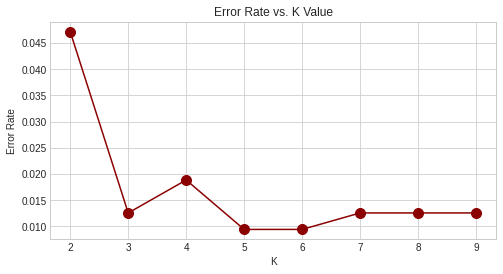

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

error_rate = []
for i in range(2,10):    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(8,4))
plt.plot(range(2,10),error_rate,color='darkred', marker='o',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# Create KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn1.fit(X_train, y_train)

#Predict the response for test dataset
y_predwithknn = knn1.predict(X_test)
y_predwithknn

Creating best KNN value classifier

In [39]:
# Create KNN Classifier
knn1 = KNeighborsClassifier(n_neighbors=4)

#Train the model using the training sets
knn1.fit(X_train, y_train)

#Predict the response for test dataset
y_predwithknn = knn1.predict(X_test)
y_predwithknn

array([2, 2, 4, 4, 5, 2, 4, 2, 1, 3, 5, 0, 5, 3, 3, 2, 5, 4, 5, 2, 3, 2,
       1, 0, 0, 5, 2, 4, 5, 1, 3, 2, 5, 0, 2, 2, 5, 0, 3, 3, 4, 2, 0, 1,
       1, 4, 0, 3, 5, 4, 4, 0, 2, 2, 4, 0, 2, 5, 3, 2, 1, 3, 2, 0, 4, 3,
       0, 3, 2, 1, 0, 4, 3, 0, 4, 3, 5, 3, 2, 3, 0, 2, 2, 3, 3, 2, 4, 0,
       2, 4, 5, 3, 5, 5, 0, 4, 5, 3, 5, 5, 0, 5, 2, 2, 3, 1, 0, 2, 3, 3,
       5, 5, 0, 0, 0, 5, 5, 5, 0, 2, 2, 5, 1, 0, 3, 3, 0, 2, 0, 4, 5, 4,
       3, 3, 0, 4, 4, 3, 5, 5, 3, 0, 5, 5, 1, 4, 2, 2, 1, 1, 5, 4, 5, 0,
       2, 1, 3, 2, 2, 0, 2, 5, 5, 1, 4, 3, 1, 3, 4, 2, 2, 4, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 4, 2, 0, 5, 5, 4, 2, 0, 5, 1, 2, 4, 4, 0, 0, 5, 4,
       4, 3, 2, 4, 1, 5, 2, 5, 1, 0, 1, 5, 3, 2, 4, 5, 3, 3, 5, 1, 3, 5,
       3, 4, 2, 5, 0, 4, 5, 5, 1, 4, 5, 4, 5, 4, 5, 0, 3, 4, 2, 1, 3, 1,
       2, 0, 2, 3, 4, 4, 2, 2, 4, 2, 0, 5, 0, 4, 1, 2, 4, 0, 0, 4, 4, 3,
       3, 0, 4, 1, 5, 3, 1, 3, 2, 1, 5, 4, 1, 2, 4, 3, 1, 5, 4, 0, 4, 3,
       4, 2, 4, 2, 3, 5, 5, 1, 5, 4, 5, 2, 4, 1, 3,

Accuracy with knn classifier

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predwithknn))
y_predwithknn
print("Precison:",metrics.precision_score(y_test, y_predwithknn,average='weighted') )
print("recall:",metrics.recall_score(y_test, y_predwithknn,average='weighted') )
print("F1Score:",metrics.f1_score(y_test, y_predwithknn,average='weighted') )

Accuracy: 0.9811320754716981
Precison: 0.9814210407524598
recall: 0.9811320754716981
F1Score: 0.98110503394178


Random forest classifier

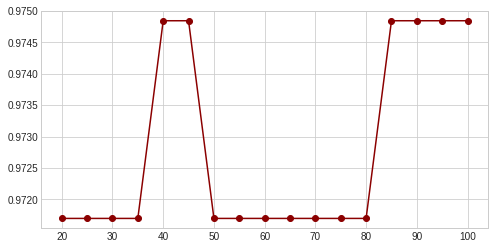

In [41]:
from sklearn.ensemble import RandomForestClassifier

results = []
n_estimaor_options = [20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
for trees in n_estimaor_options:
    model = RandomForestClassifier(trees,  random_state=0)
    model.fit(X_train, y_train)
    y_pred12 = model.predict(X_test)
    accuracy = np.mean(y_test==y_pred12)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, n_estimaor_options).plot(color="darkred",marker="o")






# #Create a Gaussian Classifier
# rand=RandomForestClassifier(n_estimators=20)

# #Train the model using the training sets y_pred=clf.predict(X_test)
# rand.fit(X_train,y_train)

# y_predwithrand=rand.predict(X_test)
# y_predwithrand

In [42]:

#Create a Gaussian Classifier
rand=RandomForestClassifier(n_estimators=38)

#Train the model using the training sets y_pred=clf.predict(X_test)
rand.fit(X_train,y_train)

y_predwithrand=rand.predict(X_test)
y_predwithrand

array([2, 2, 4, 4, 5, 2, 4, 2, 1, 3, 5, 0, 5, 3, 3, 2, 5, 4, 5, 2, 3, 2,
       1, 0, 0, 5, 2, 4, 5, 1, 3, 2, 5, 3, 2, 2, 5, 0, 3, 3, 4, 2, 0, 1,
       1, 4, 0, 3, 5, 4, 4, 0, 2, 5, 4, 0, 2, 5, 3, 2, 1, 3, 2, 0, 4, 3,
       0, 3, 2, 1, 0, 4, 3, 0, 4, 3, 5, 3, 2, 3, 0, 2, 2, 3, 3, 2, 4, 0,
       2, 4, 5, 3, 5, 5, 0, 4, 5, 3, 5, 5, 0, 5, 2, 2, 3, 1, 0, 2, 3, 3,
       5, 5, 0, 0, 0, 5, 5, 5, 0, 2, 2, 5, 1, 0, 3, 3, 0, 2, 0, 4, 5, 4,
       3, 3, 0, 4, 4, 3, 5, 5, 3, 0, 5, 5, 1, 4, 3, 2, 1, 1, 5, 4, 5, 0,
       2, 1, 3, 2, 2, 3, 2, 5, 5, 1, 4, 3, 1, 3, 4, 2, 2, 4, 2, 3, 1, 0,
       2, 3, 1, 3, 2, 4, 2, 0, 5, 5, 4, 2, 0, 5, 1, 2, 4, 4, 0, 0, 5, 4,
       4, 3, 2, 4, 1, 5, 2, 5, 1, 0, 1, 5, 3, 2, 4, 5, 3, 3, 5, 1, 3, 5,
       3, 4, 2, 5, 0, 4, 5, 5, 1, 4, 5, 4, 5, 4, 5, 0, 3, 4, 2, 1, 3, 1,
       2, 0, 2, 3, 4, 4, 2, 2, 4, 2, 0, 5, 0, 4, 1, 2, 4, 0, 0, 4, 4, 3,
       3, 0, 4, 1, 5, 3, 1, 3, 2, 1, 5, 4, 1, 2, 4, 3, 1, 5, 4, 0, 4, 3,
       4, 2, 4, 2, 3, 5, 5, 1, 5, 4, 5, 2, 4, 1, 3,

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_predwithrand))
y_predwithrand

print("Precison:",metrics.precision_score(y_test, y_predwithrand,average='weighted') )
print("recall:",metrics.recall_score(y_test, y_predwithrand,average='weighted') )
print("F1Score:",metrics.f1_score(y_test, y_predwithrand,average='weighted') )

Accuracy: 0.9874213836477987
Precison: 0.9875220731314143
recall: 0.9874213836477987
F1Score: 0.9874163162930596
